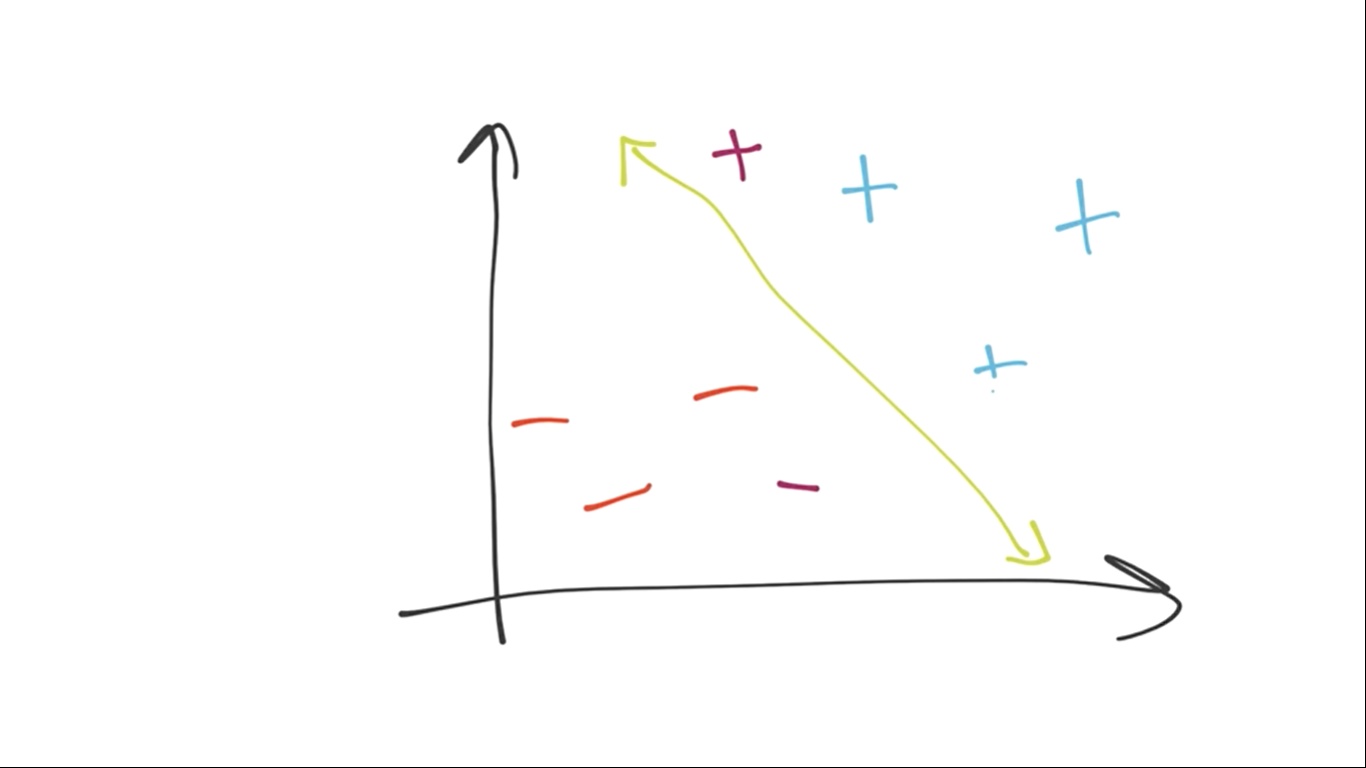

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing, neighbors ,svm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:\Local Disk E\Ahsan\OnlineCourse\Machine Learing\Practical-Implementation-of-ML\\breast-cancer-wisconsin.data")
df.replace('?',-99999,inplace=True)
df.drop('id',1,inplace=True)
full_data =df.astype(float).values.tolist()
df.head()

clump_thickness  unif_cell_size  unif_cell_shape  marg_adhesion  \
0                5               1                1              1   
1                5               4                4              5   
2                3               1                1              1   
3                6               8                8              1   
4                4               1                1              3   

   single_epith_cell_size bare_unclei  bland_chrom  norm_uncleoli  mitoses  \
0                       2           1            3              1        1   
1                       7          10            3              2        1   
2                       2           2            3              1        1   
3                       3           4            3              7        1   
4                       2           1            3              1        1   

   class  
0      2  
1      2  
2      2  
3      2  
4      2

In [3]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [5]:
clf = svm.SVC()
clf.fit(X_train,y_train)

C:\Users\Conure\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9571428571428572


In [7]:
example_measure = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
np.shape(example_measure)

(2, 9)

In [8]:
example_measure = example_measure.reshape(len(example_measure),-1)
np.shape(example_measure)

(2, 9)

In [9]:
prediction = clf.predict(example_measure)
print(prediction)

[2 2]



### Understanding Vectors


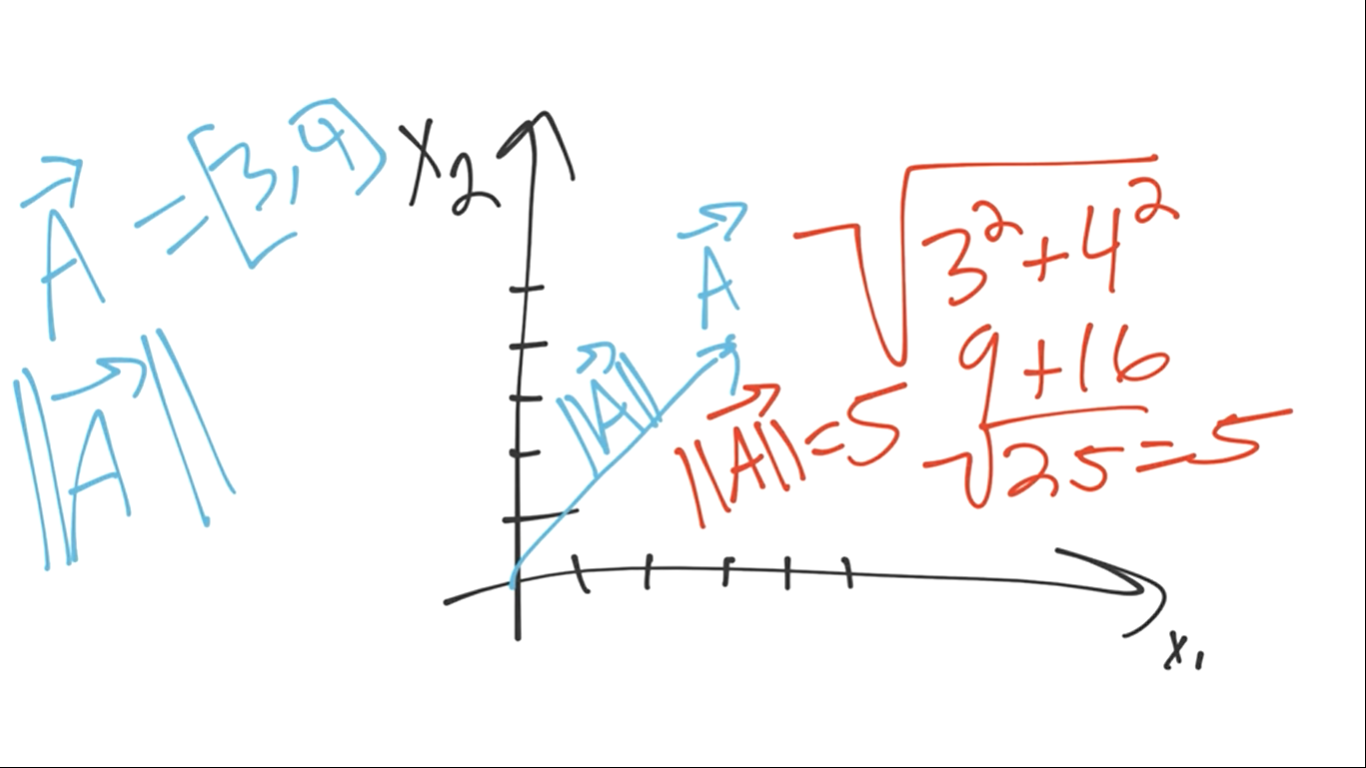

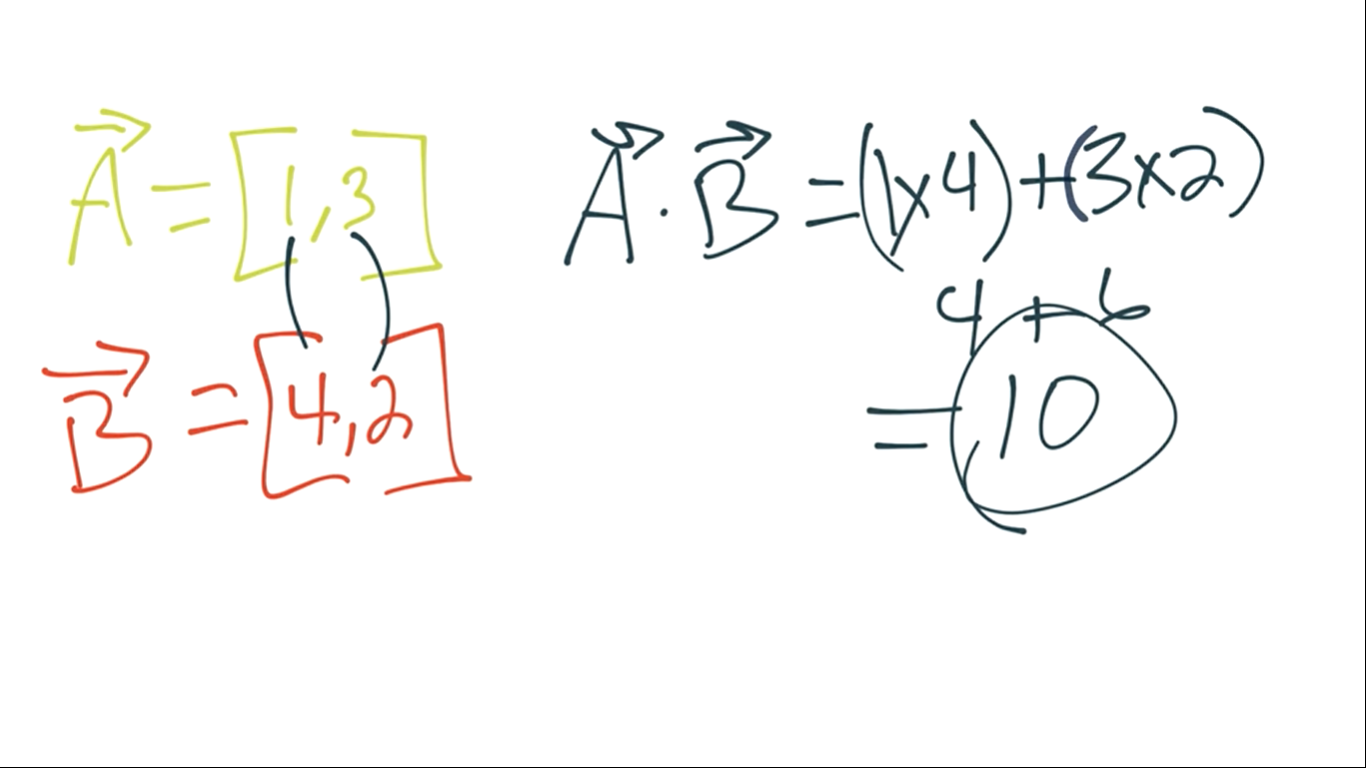

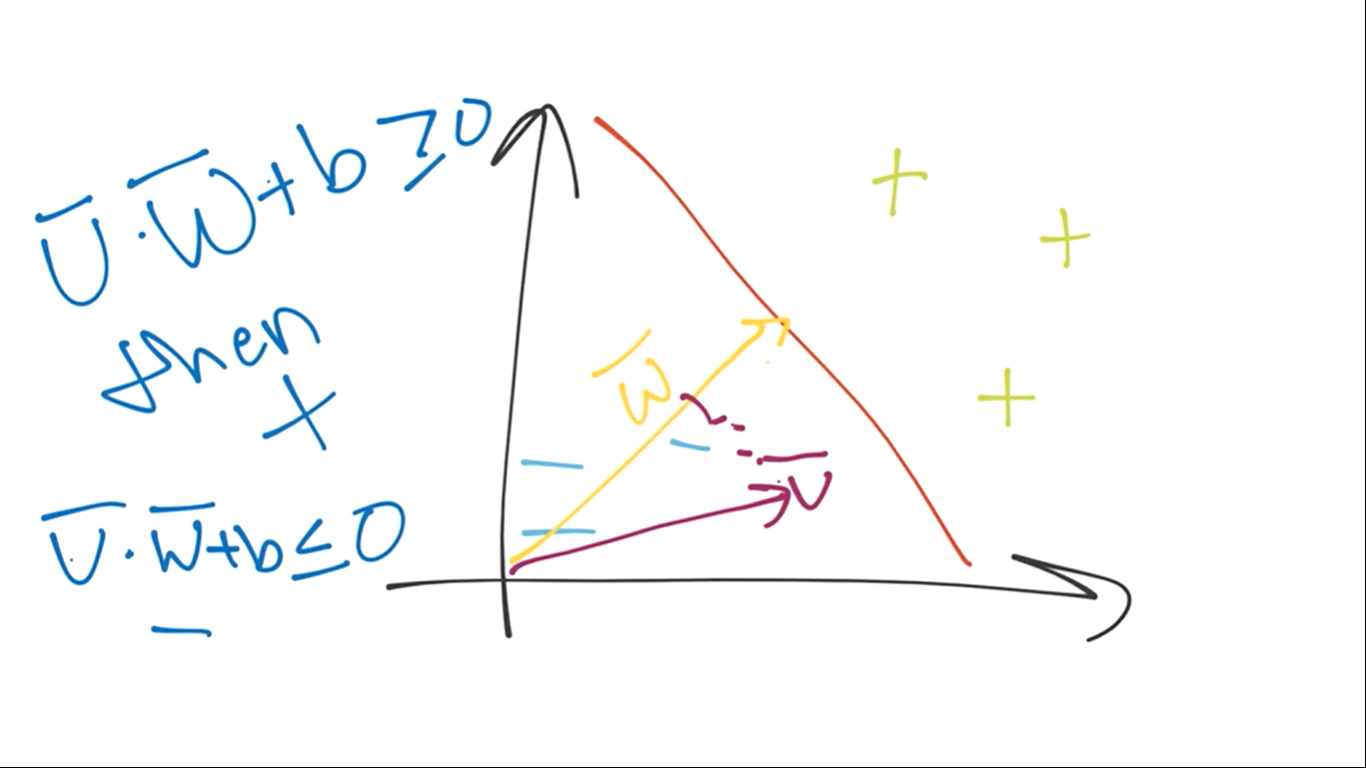

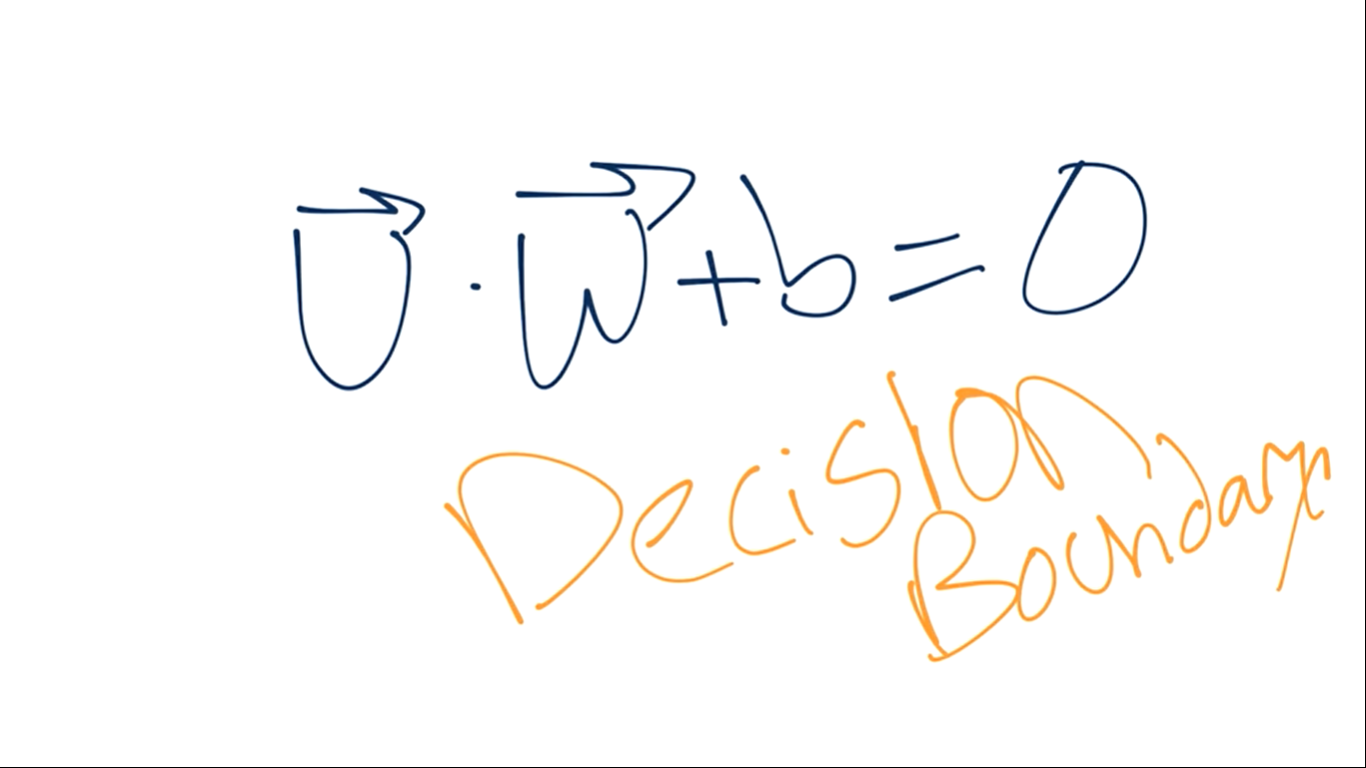

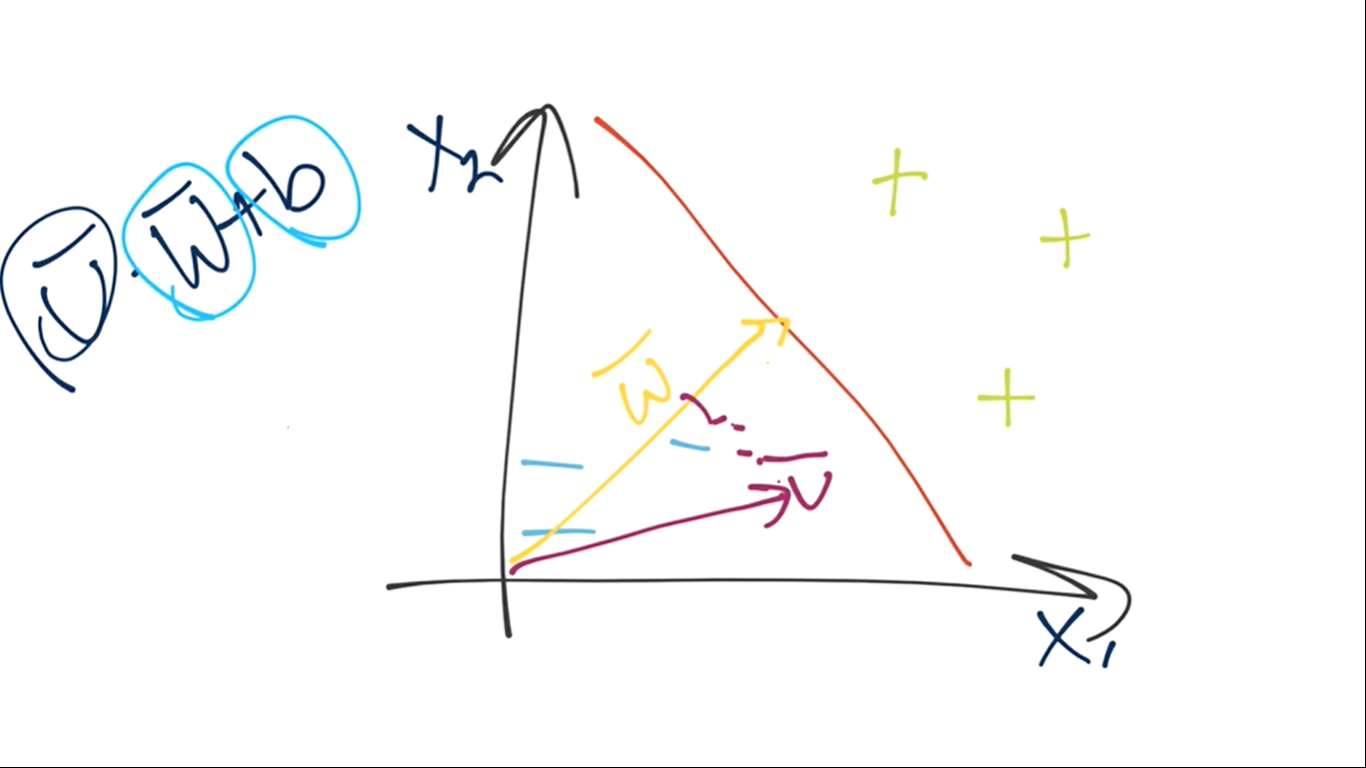

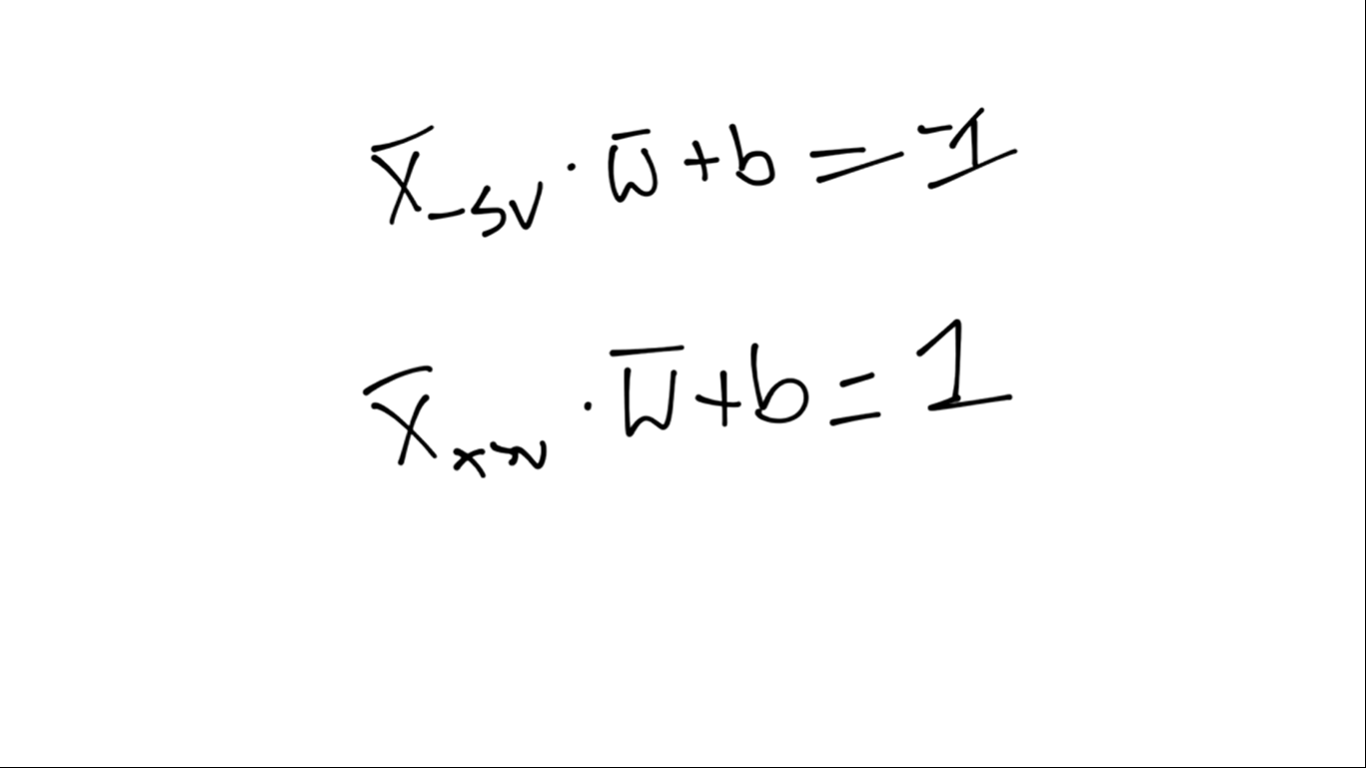

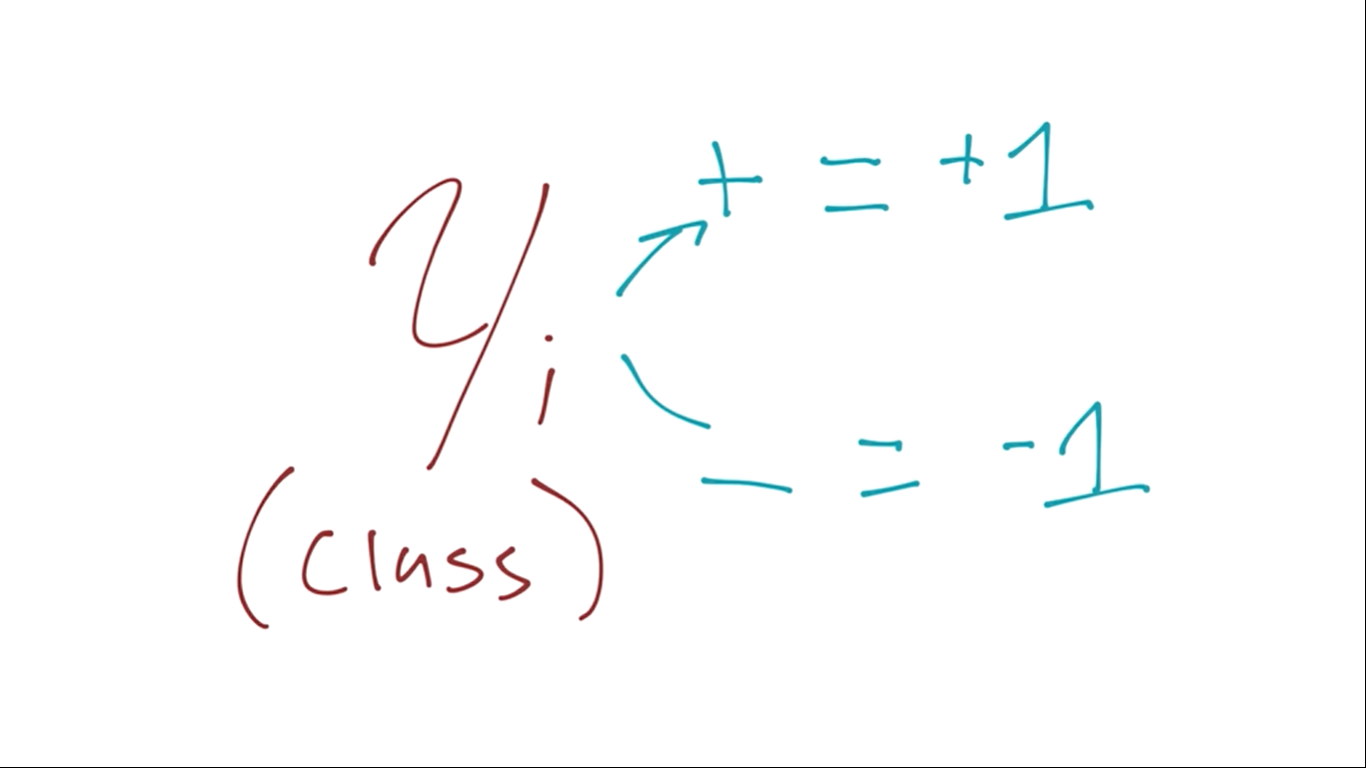

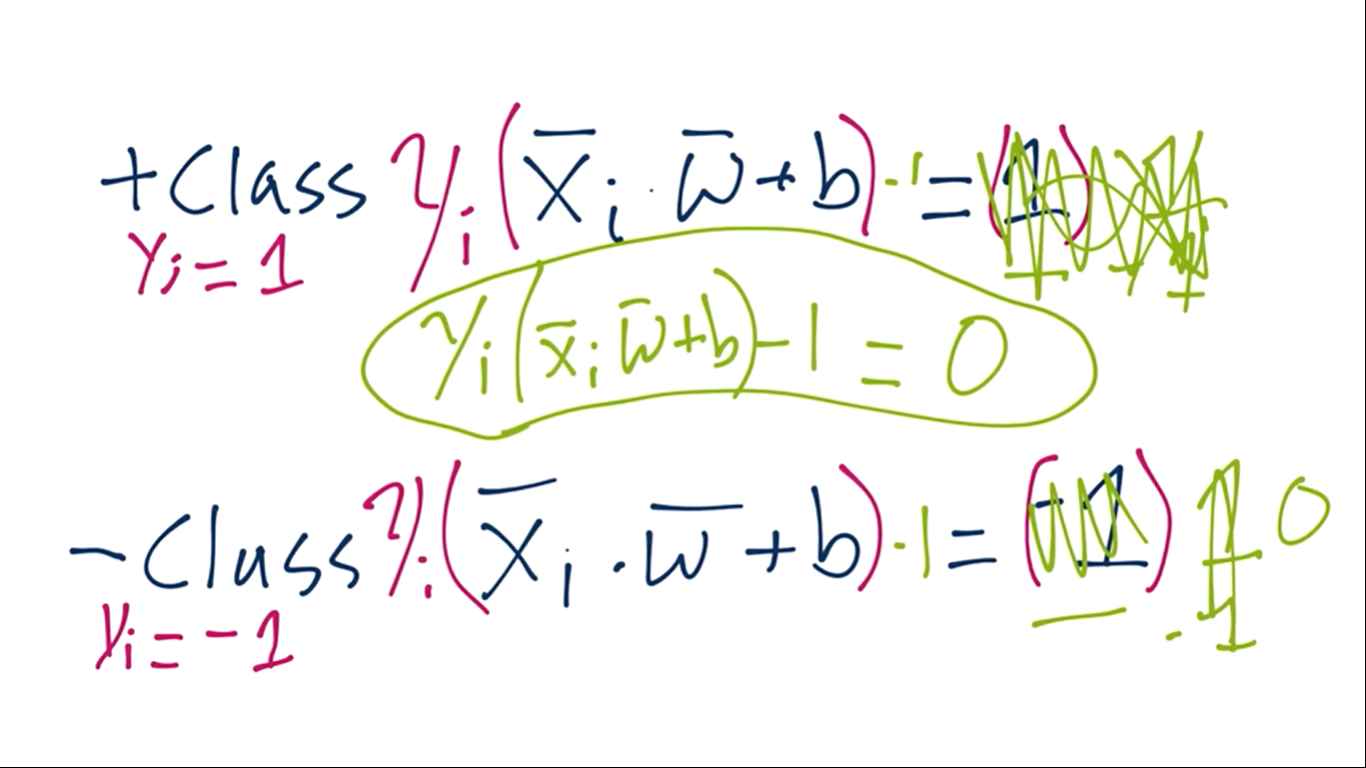

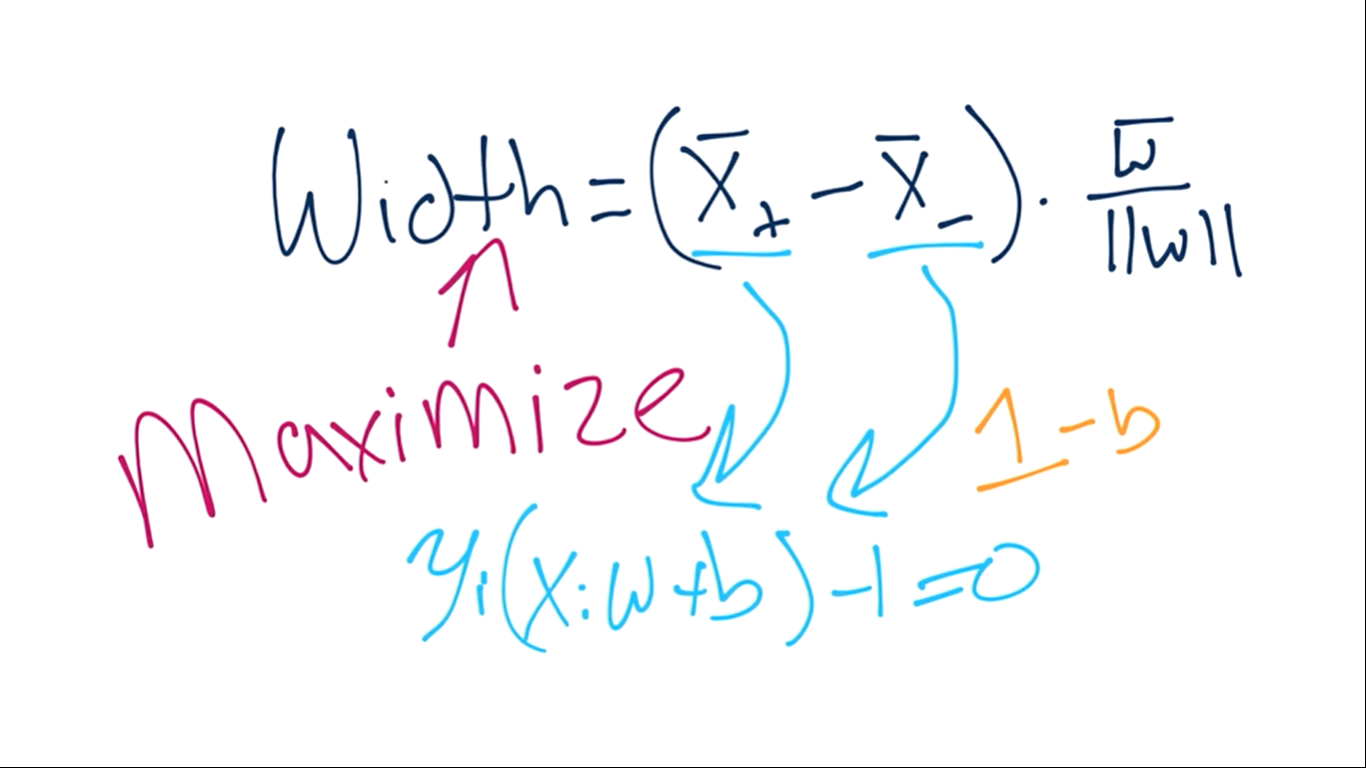

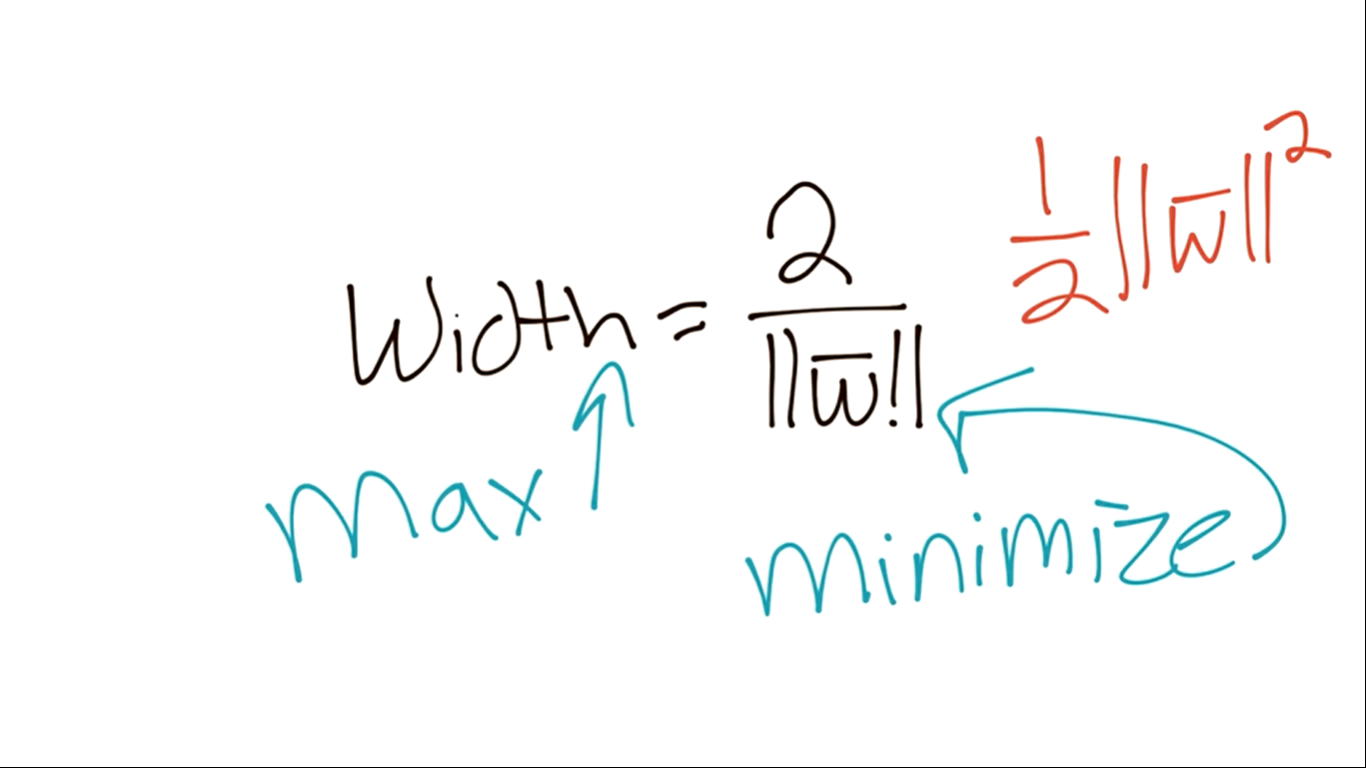

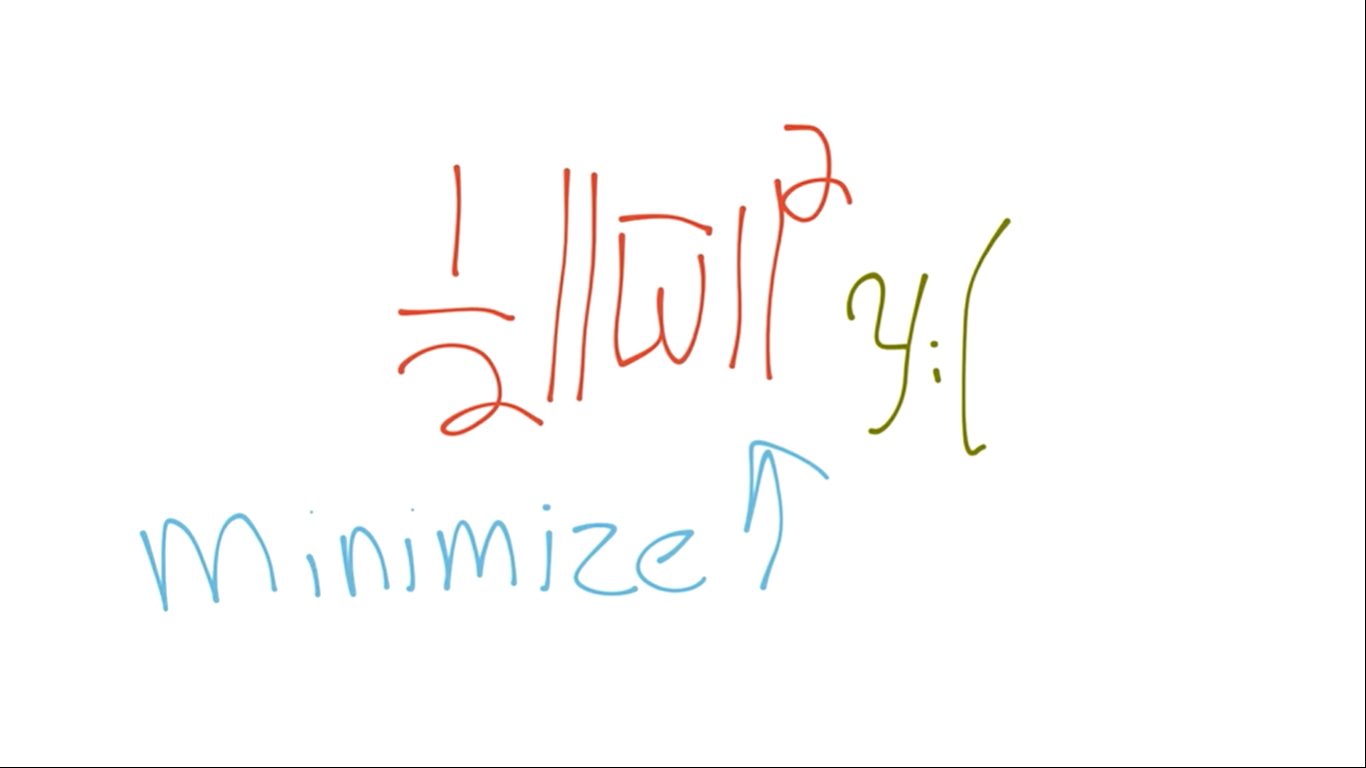

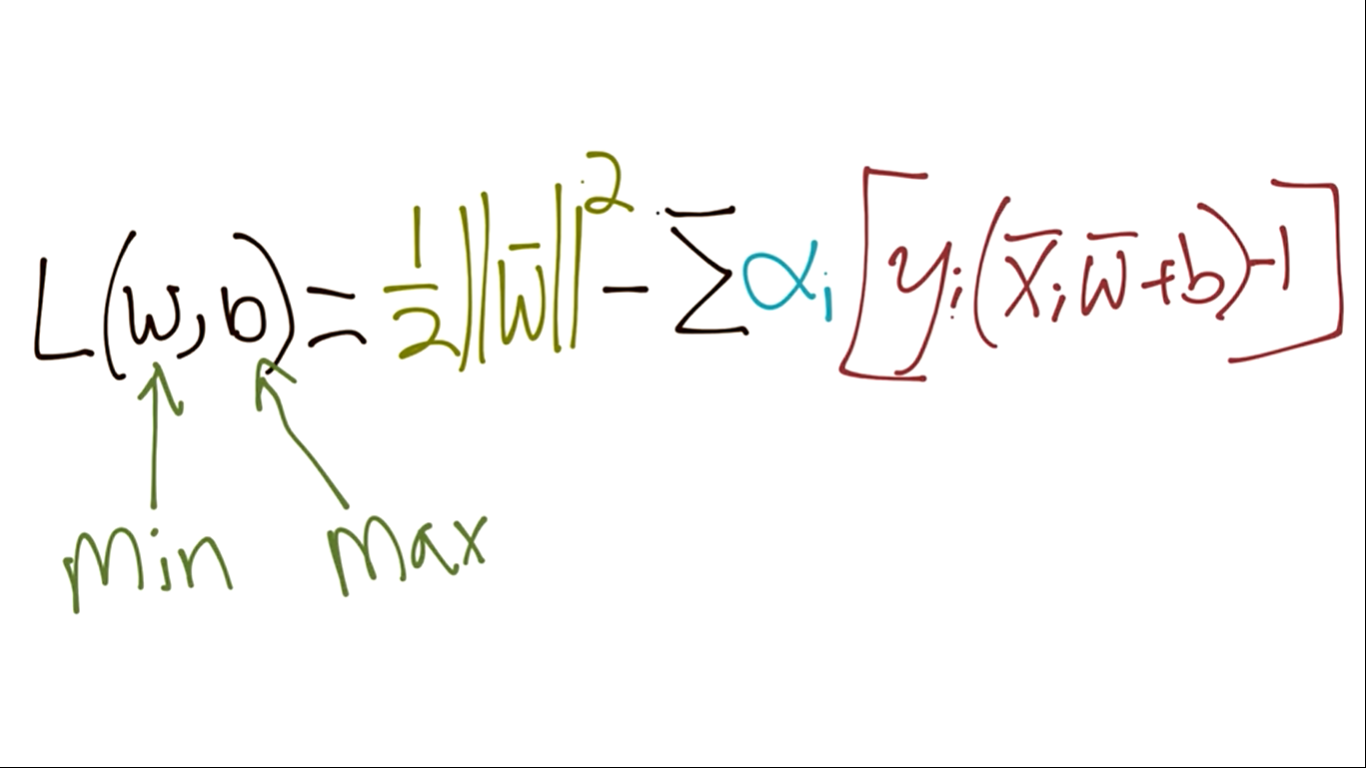

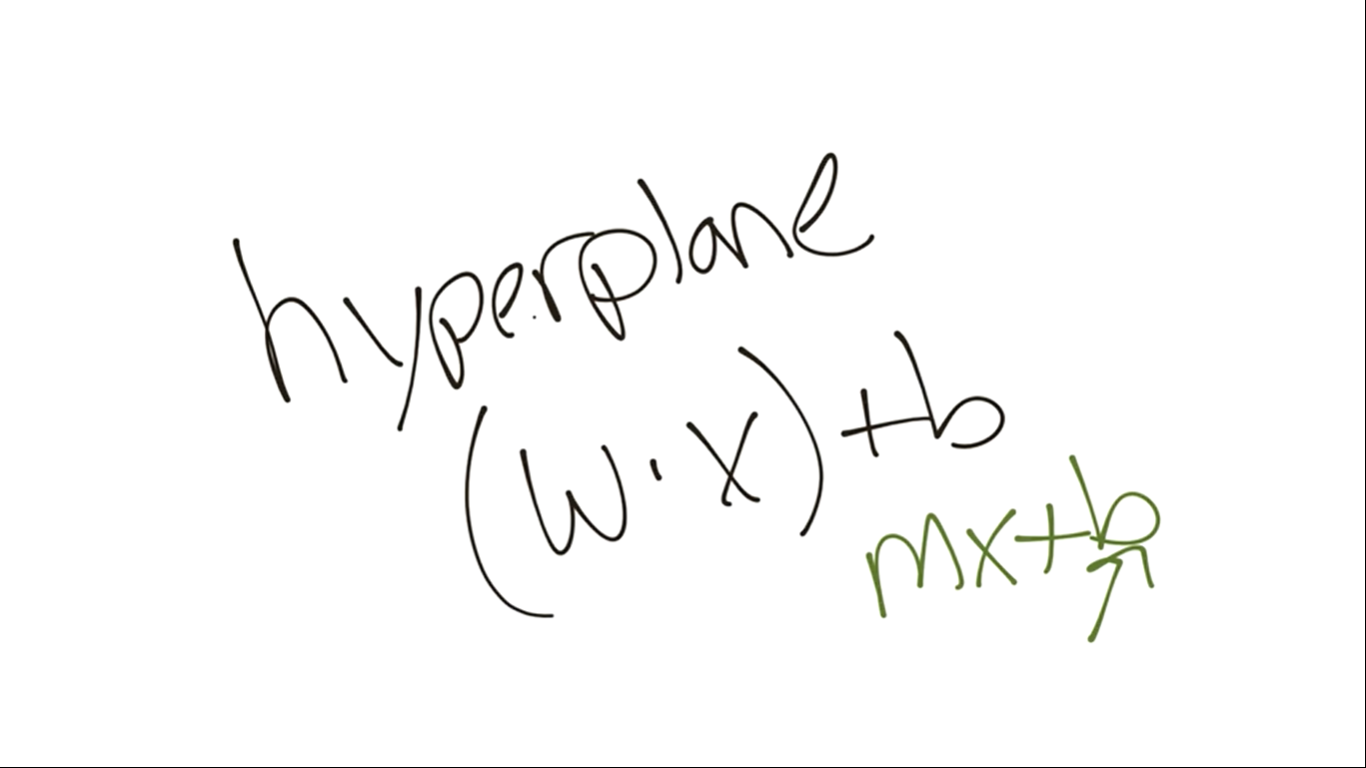

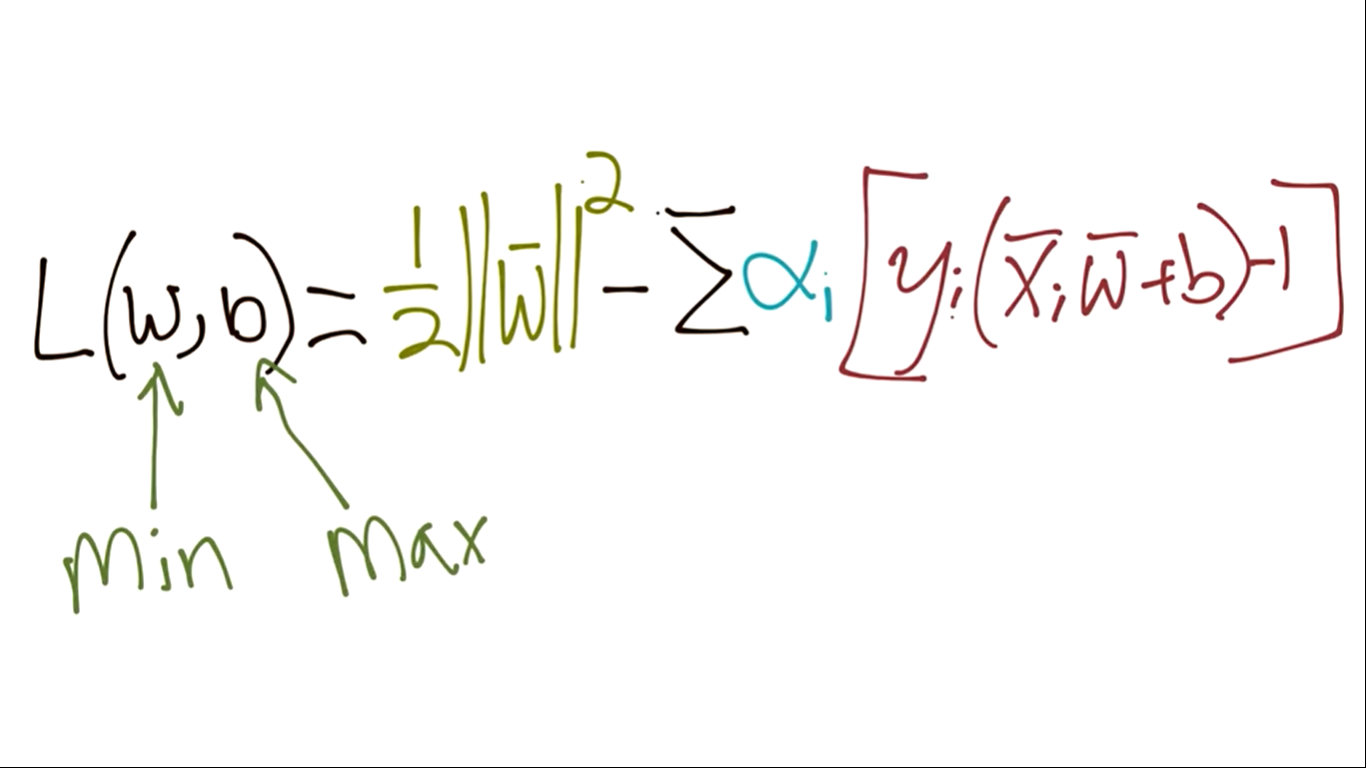

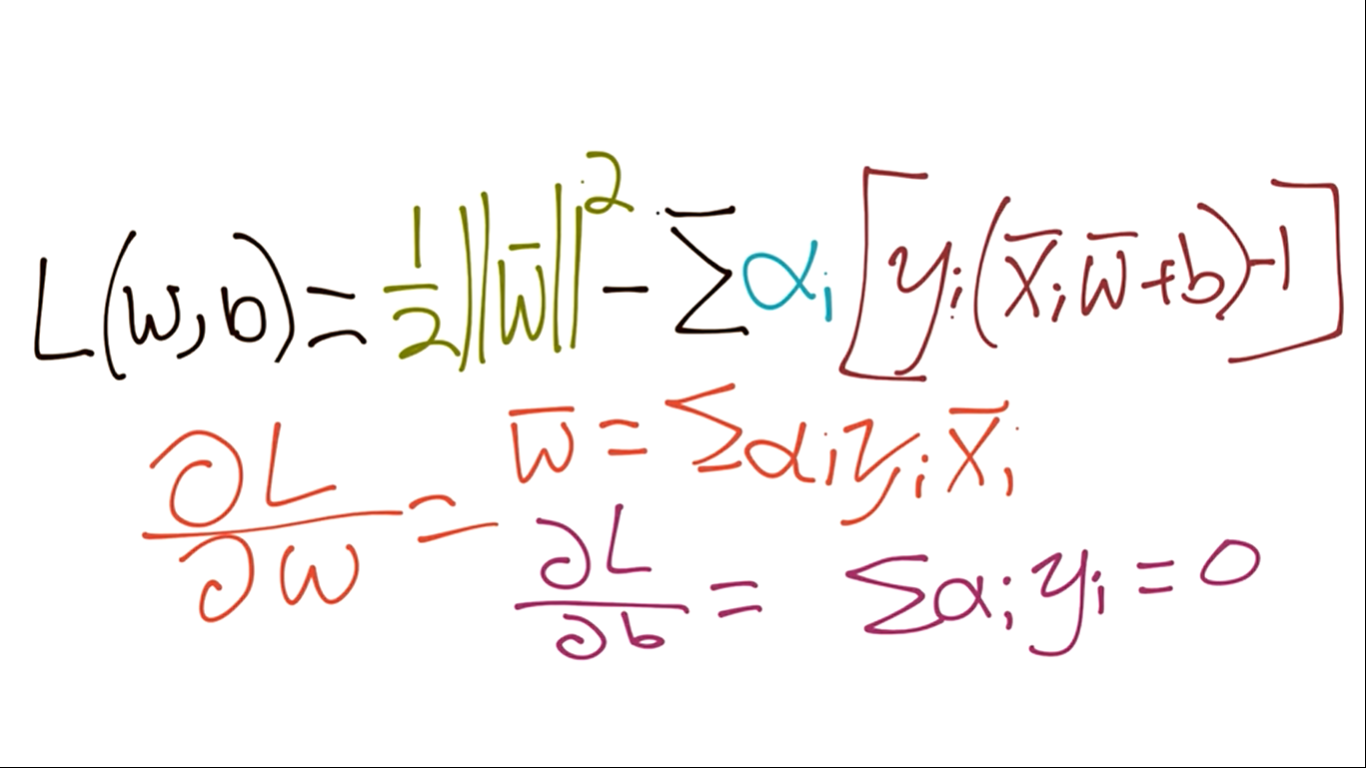

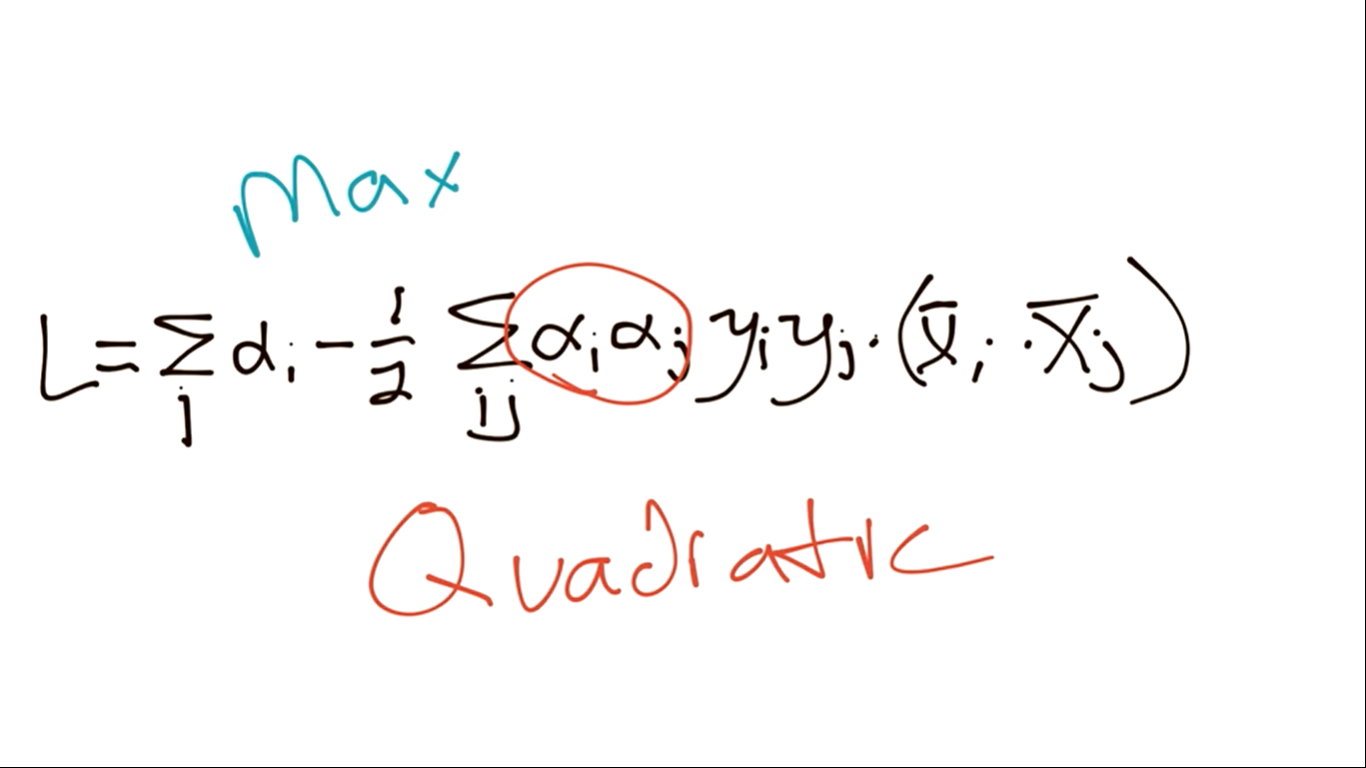

### Support Vector Machine Optimization

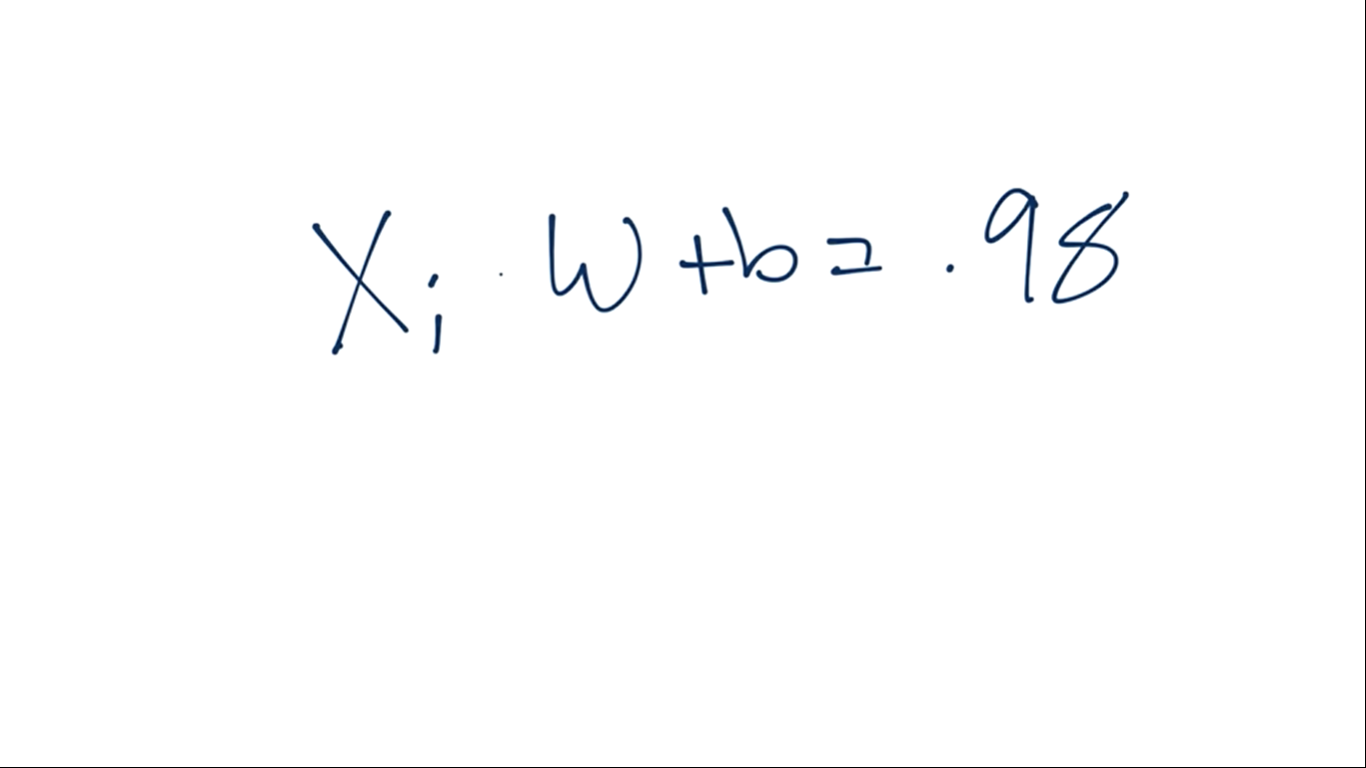

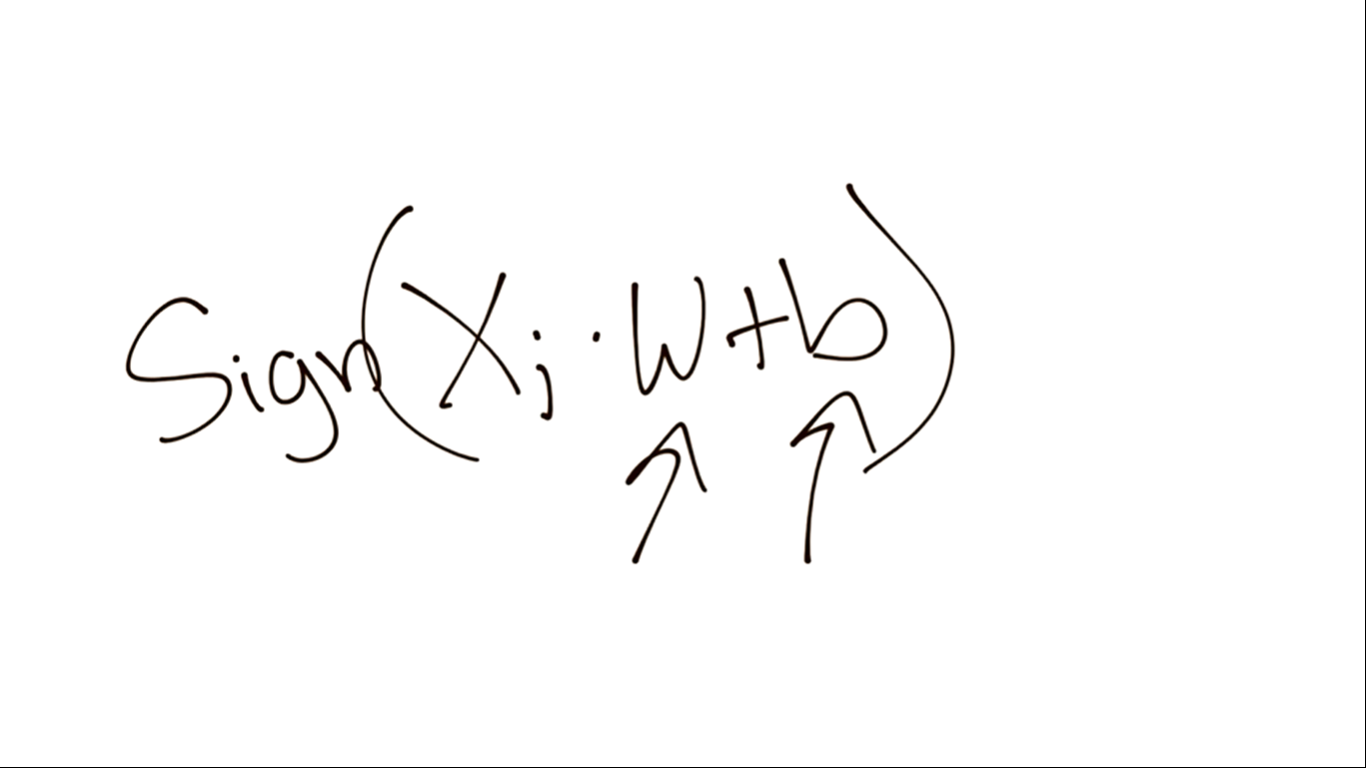

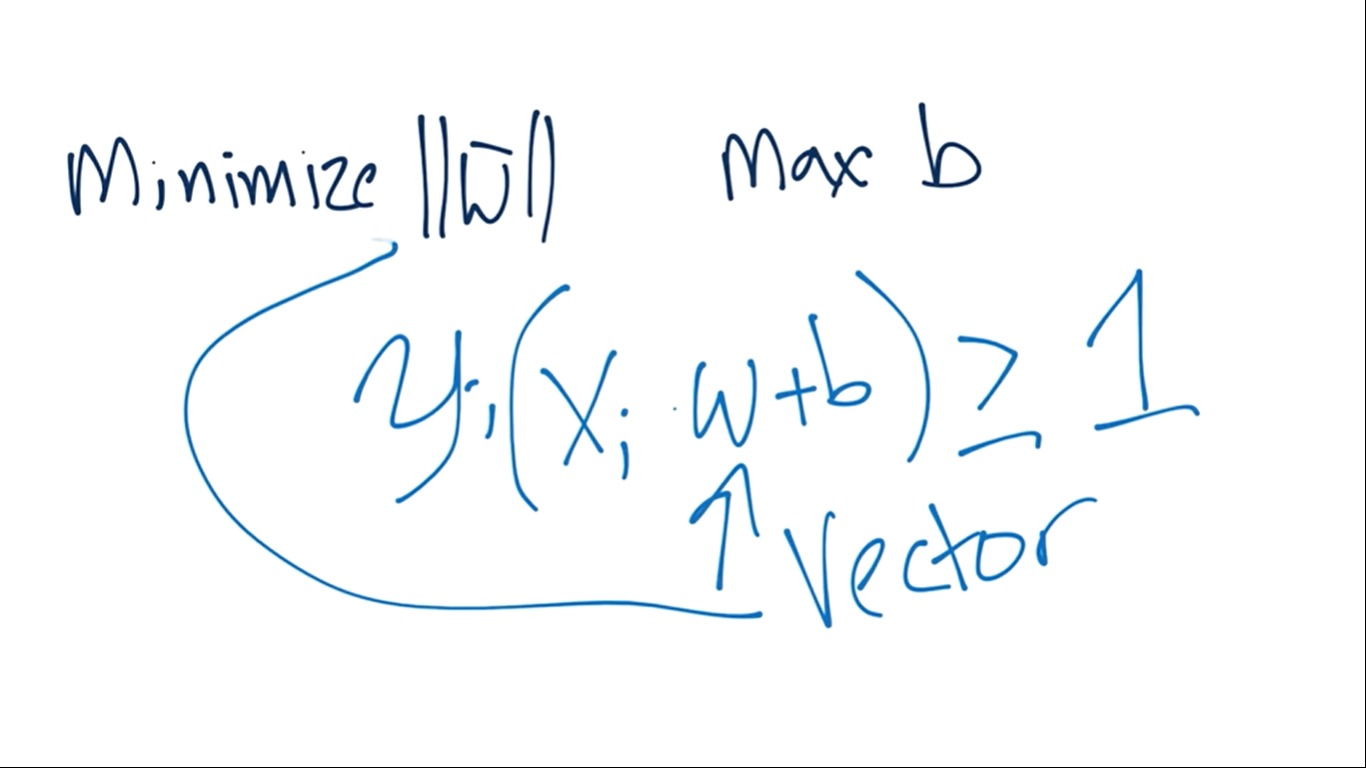

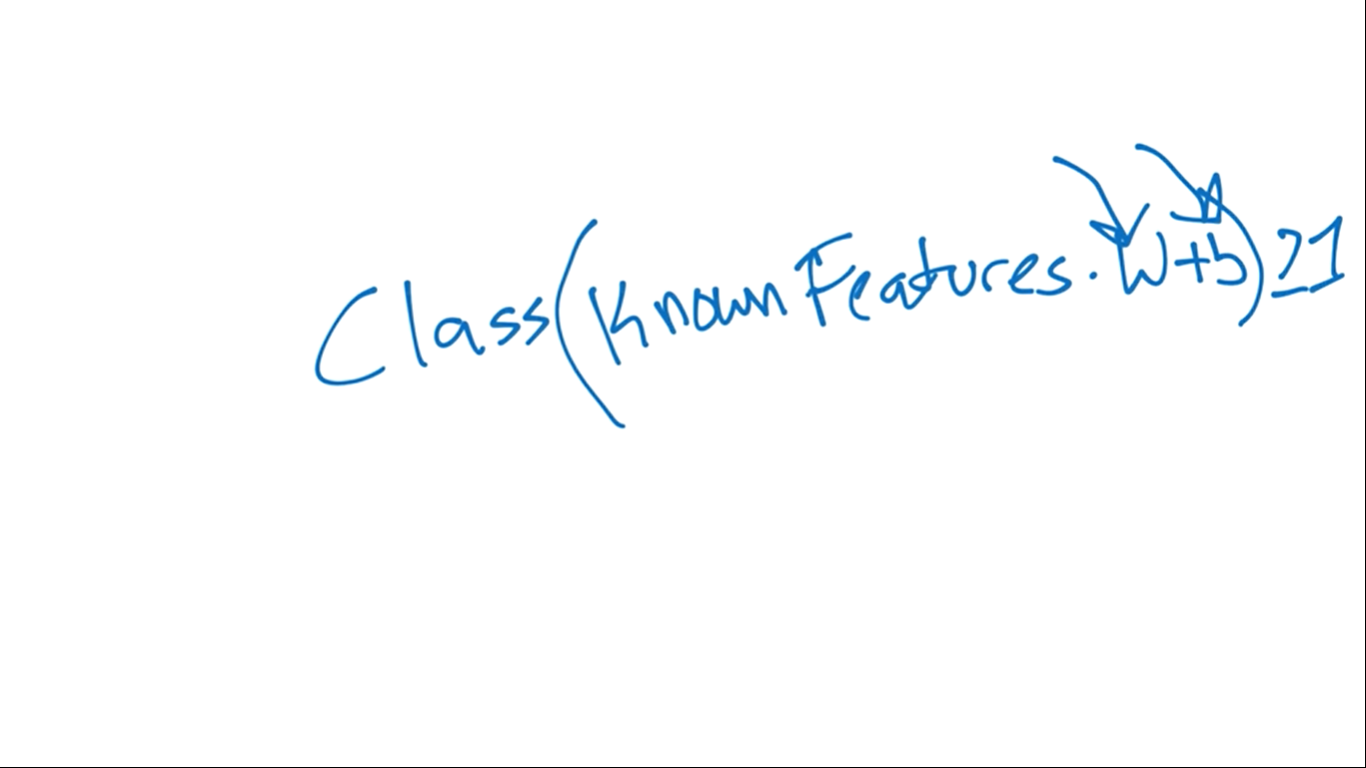

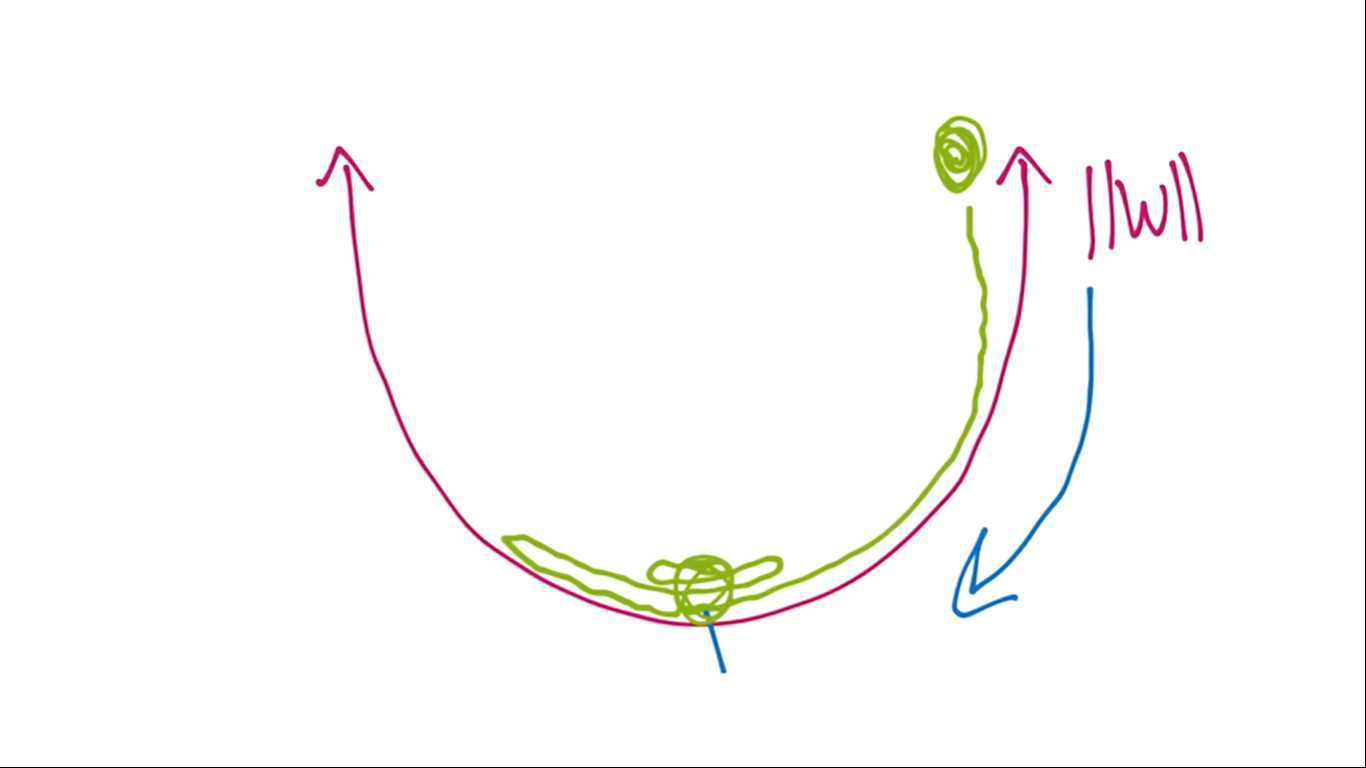

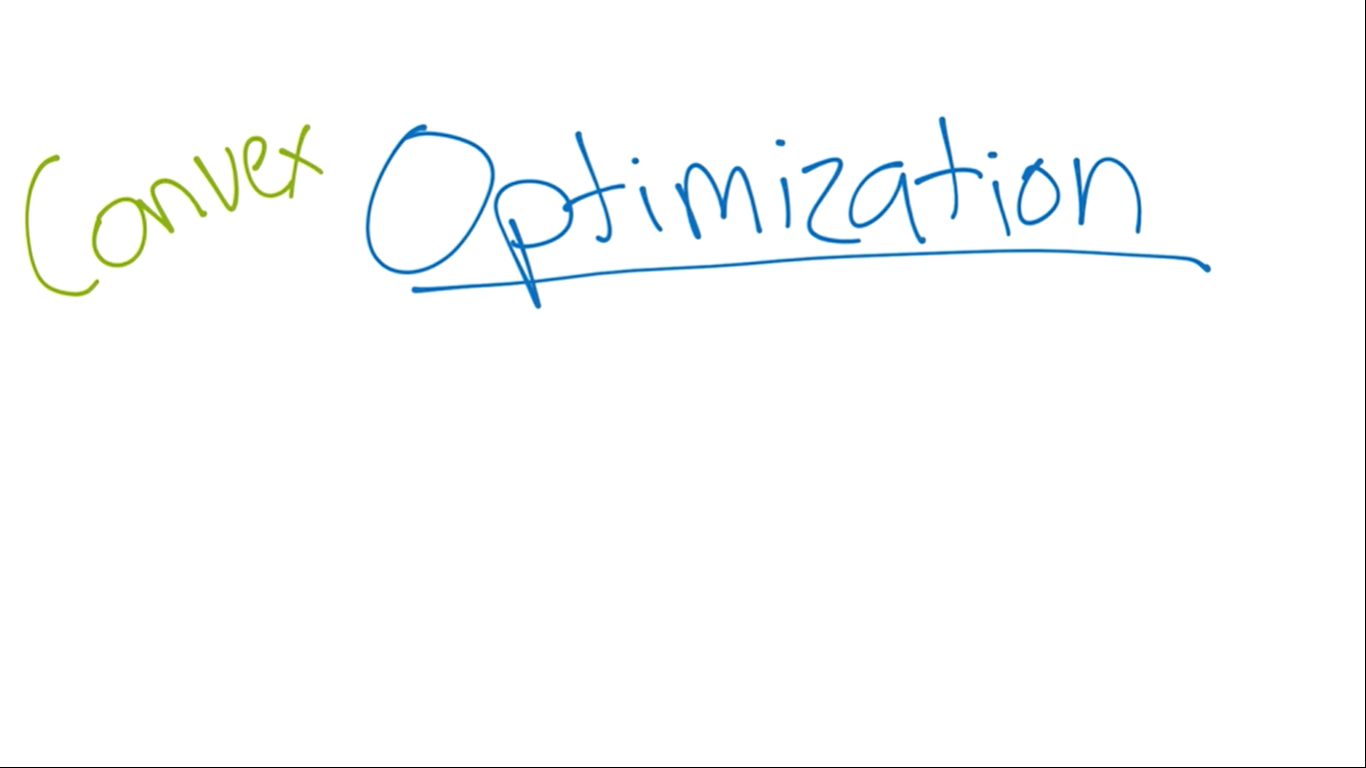

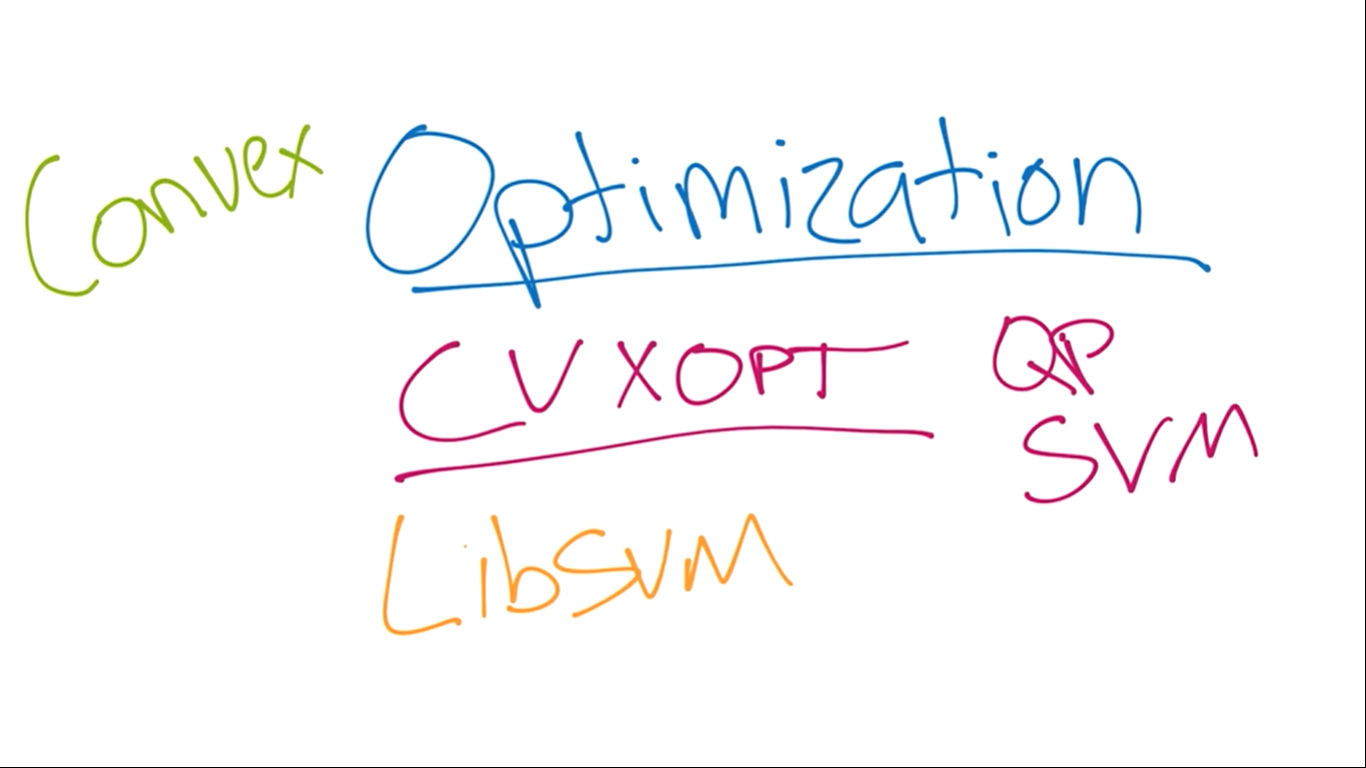

In [10]:
import matplotlib.pyplot as plt
from matplotlib import style 

style.use('ggplot')

In [11]:
class Support_Vector_Machine:
    def __init__(self,visualisation):
        self.visualisation = visualisation
        self.color = {1:'r',-1:'b'}
        
        if self.visualisation:
            self.fig = plt.figure()
            self.ax  = self.fig.add_subplot(1,1,1)
    
    def fit(self,data):
        self.data = data
        # {||w||:[w,b]}
        
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = []
        
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # support vectors yi(xi.w+b) = i
        
        step_size = [self.max_feature_value * 0.1,
                     self.max_feature_value * 0.01,
                     # point of expense
                     self.max_feature_value * 0.001,]
        
        # extremely expensive
        b_range_multile = 5
        # we dont need to take small steps as we do in w
        b_mulitple = 5
        
        latest_optimum = self.max_feature_value*10
        
        for step in step_size:
            w = np.array([latest_optimum,latest_optimum])
            #we can do this beacause convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multile),
                                   self.max_feature_value*b_range_multile,
                                   step*b_mulitple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix ths a bit
                        # yi (xi.w+b)>=1
                        ### add break here later
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi * (np.dot(w_t,xi)+b) >=1:
                                    found_option = False
                               # print( xi,':',yi * (np.dot(w_t,xi)+b))
                                
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step')
                else:
                    # w = [5,5]
                    # step = 1
                    # w - [step - step]
                    w = w - step
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            # ||w|| : [w,b]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
                
                
    def predict(self,features):
        # sign(x.w+b) implementing the equation
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification != 0 and self.visualisation:
            self.ax.scatter(features[0],features[1],s=200,marker="*",c=self.color[classification])
            
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.color[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1 
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (x.w+b) = 1
        # positive support vector hyperplane
        
        psv1 = hyperplane(hyp_x_min, self.w, self.b,1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')
        
        # (x.w+b) = -1
        # Negative support vector hyperplane
        
        nsv1 = hyperplane(hyp_x_min, self.w, self.b,-1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')
        
        # (x.w+b) = 1
        # positive support vector hyperplane
        
        db1 = hyperplane(hyp_x_min, self.w, self.b,0)
        db2 = hyperplane(hyp_x_max, self.w, self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        plt.show()
        

In [12]:
data_dict = {-1:np.array([[1,7],[2,8],[3,8],]),1:np.array([[5,1],[6,-1],[7,3],]) }
data_dict

{-1: array([[1, 7],
        [2, 8],
        [3, 8]]), 1: array([[ 5,  1],
        [ 6, -1],
        [ 7,  3]])}

In [14]:
predict_us = [[0,10],[1,3],[3,4],[3,5],[3,5],[5,5],[5,6],[6,-5],[5,8]]

Optimized a step
Optimized a step
Optimized a step


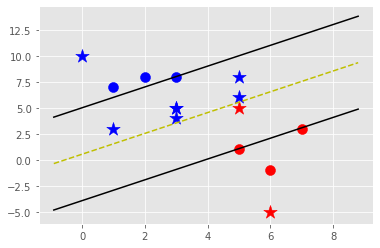

In [16]:
svm = Support_Vector_Machine(visualisation=True)
svm.fit(data=data_dict)
for p in predict_us:
    svm.predict(p)
svm.visualize()